In [62]:
import pandas as pd

# Load the uploaded CSV files
prices_df = pd.read_csv('data.csv/NYSE/prices-split-adjusted.csv')
fundamentals_df = pd.read_csv('data.csv/NYSE/fundamentals.csv')
securities_df = pd.read_csv('data.csv/NYSE/securities.csv')

# Convert 'Total Equity' to numeric, handling errors
fundamentals_df['Total Equity'] = pd.to_numeric(fundamentals_df['Total Equity'], errors='coerce')

# Sort the dataset by 'Total Equity' in descending order and select the top 10 rows
top_10_companies = fundamentals_df.sort_values(by='Total Equity', ascending=False).head(10)

# Display the top 10 companies with the highest capital
top_10_companies_filtered = top_10_companies[['Ticker Symbol', 'Period Ending', 'Total Equity', 'Total Liabilities', 'Total Revenue']]
print("Top 10 Companies with the Highest Capital:")
print(top_10_companies_filtered)




Top 10 Companies with the Highest Capital:
    Ticker Symbol Period Ending  Total Equity  Total Liabilities  \
193           BAC    2015-12-31  2.562050e+11       1.888111e+12   
886           JPM    2015-12-31  2.475730e+11       2.104125e+12   
192           BAC    2014-12-31  2.434710e+11       1.861063e+12   
190           BAC    2012-12-31  2.369560e+11       1.973018e+12   
191           BAC    2013-12-31  2.326850e+11       1.869588e+12   
885           JPM    2014-12-31  2.317270e+11       2.340547e+12   
253             C    2015-12-31  2.218570e+11       1.509353e+12   
884           JPM    2013-12-31  2.111780e+11       2.204511e+12   
252             C    2014-12-31  2.101850e+11       1.631996e+12   
251             C    2013-12-31  2.043390e+11       1.676043e+12   

     Total Revenue  
193   9.305600e+10  
886   8.971600e+10  
192   9.518100e+10  
190   1.000780e+11  
191   1.016970e+11  
885   9.197300e+10  
253   6.802400e+10  
884   9.714200e+10  
252   6.960600e+10 

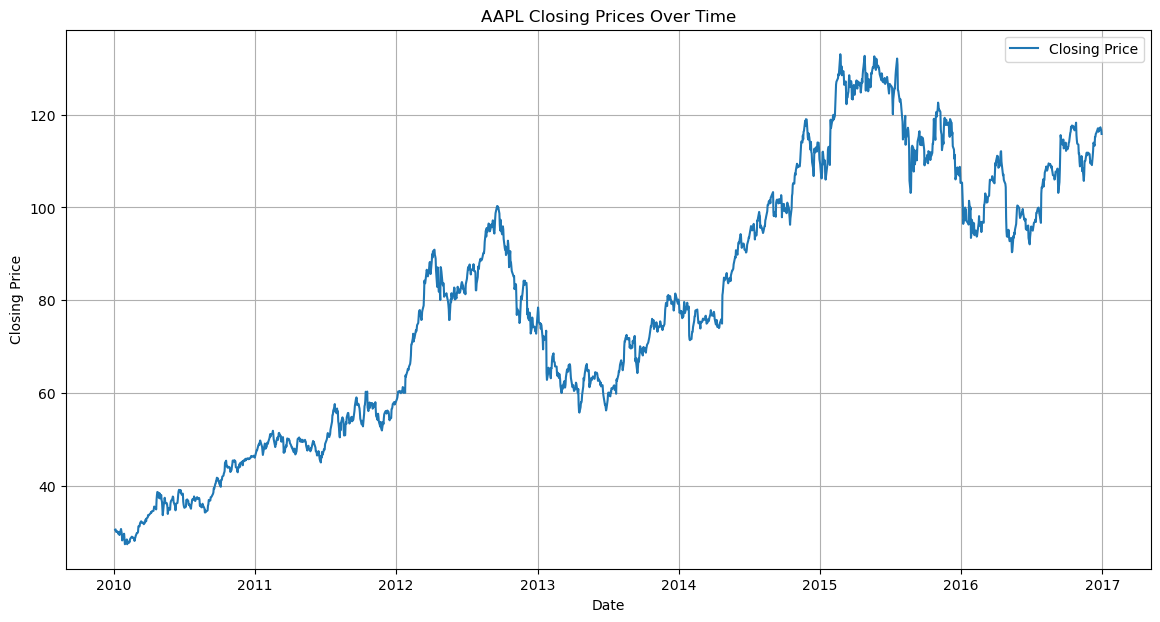

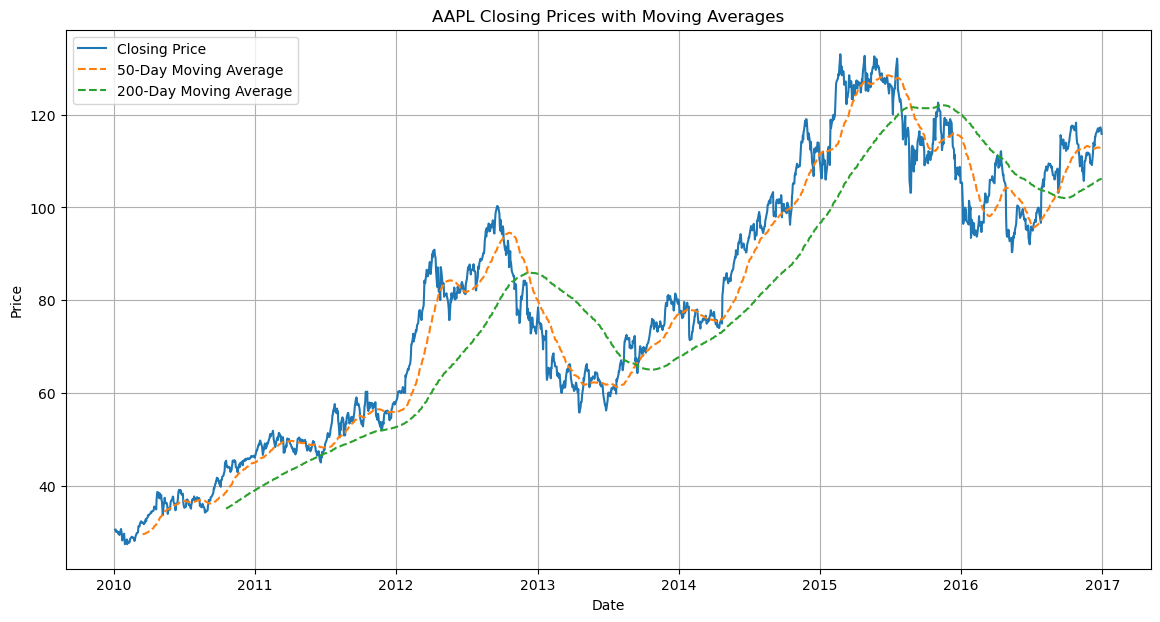

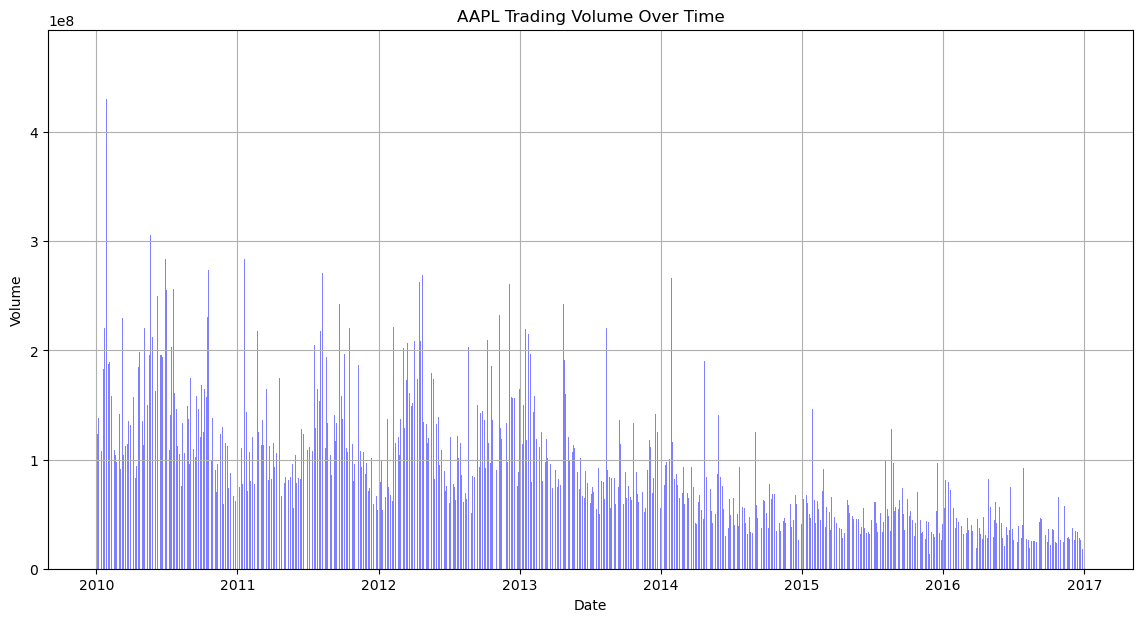

In [84]:
import matplotlib.pyplot as plt

# Filter the data for AAPL and convert 'date' column to datetime format using .loc
aapl_prices_df = prices_df[prices_df['symbol'] == 'AAPL'].copy()
aapl_prices_df.loc[:, 'date'] = pd.to_datetime(aapl_prices_df['date'])
aapl_prices_df.set_index('date', inplace=True)

# Plot the closing prices over time
plt.figure(figsize=(14, 7))
plt.plot(aapl_prices_df['close'], label='Closing Price')
plt.title('AAPL Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()

# Calculate and plot moving averages
aapl_prices_df['MA50'] = aapl_prices_df['close'].rolling(window=50).mean()
aapl_prices_df['MA200'] = aapl_prices_df['close'].rolling(window=200).mean()

plt.figure(figsize=(14, 7))
plt.plot(aapl_prices_df['close'], label='Closing Price')
plt.plot(aapl_prices_df['MA50'], label='50-Day Moving Average', linestyle='--')
plt.plot(aapl_prices_df['MA200'], label='200-Day Moving Average', linestyle='--')
plt.title('AAPL Closing Prices with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Plot the volume of trades over time
plt.figure(figsize=(14, 7))
plt.bar(aapl_prices_df.index, aapl_prices_df['volume'], color='blue', alpha=0.5)
plt.title('AAPL Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.show()



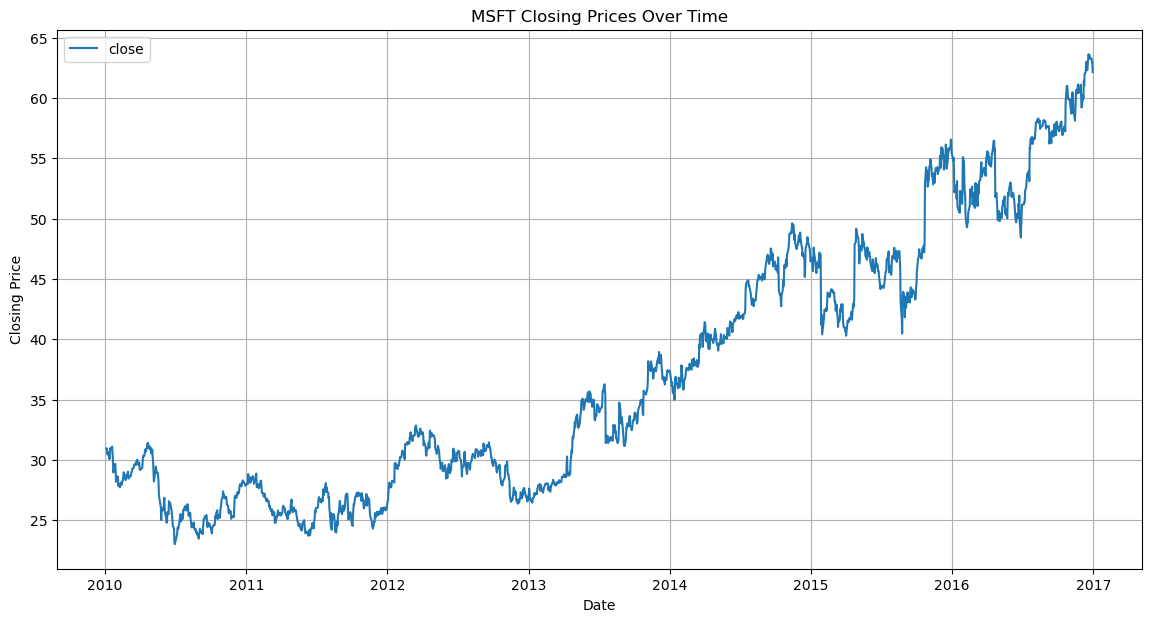

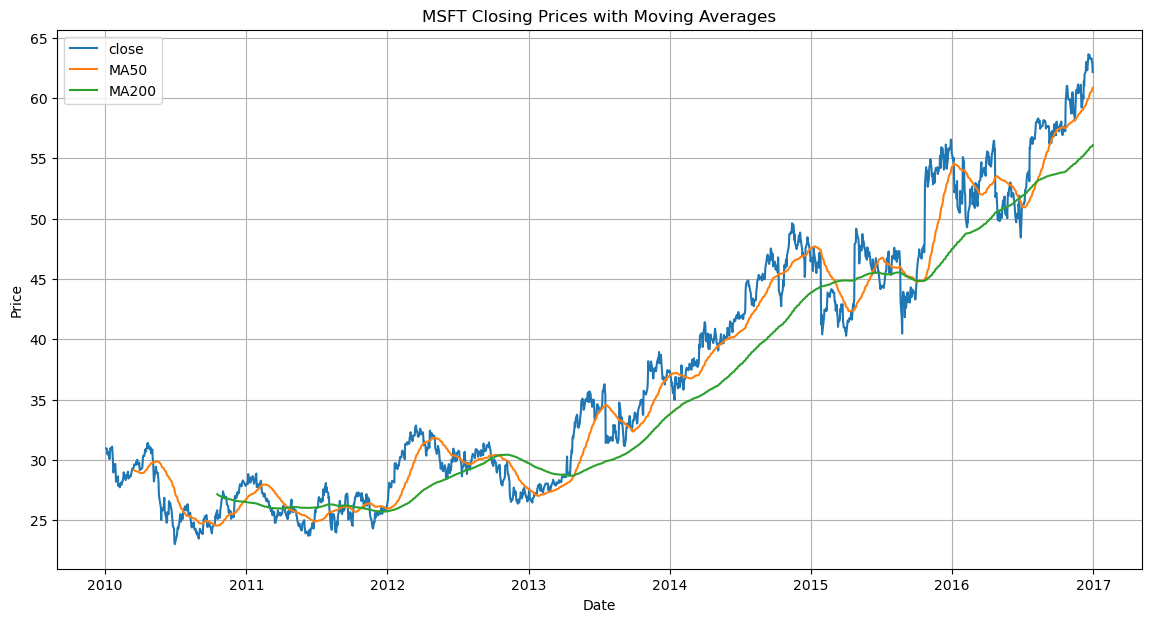

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


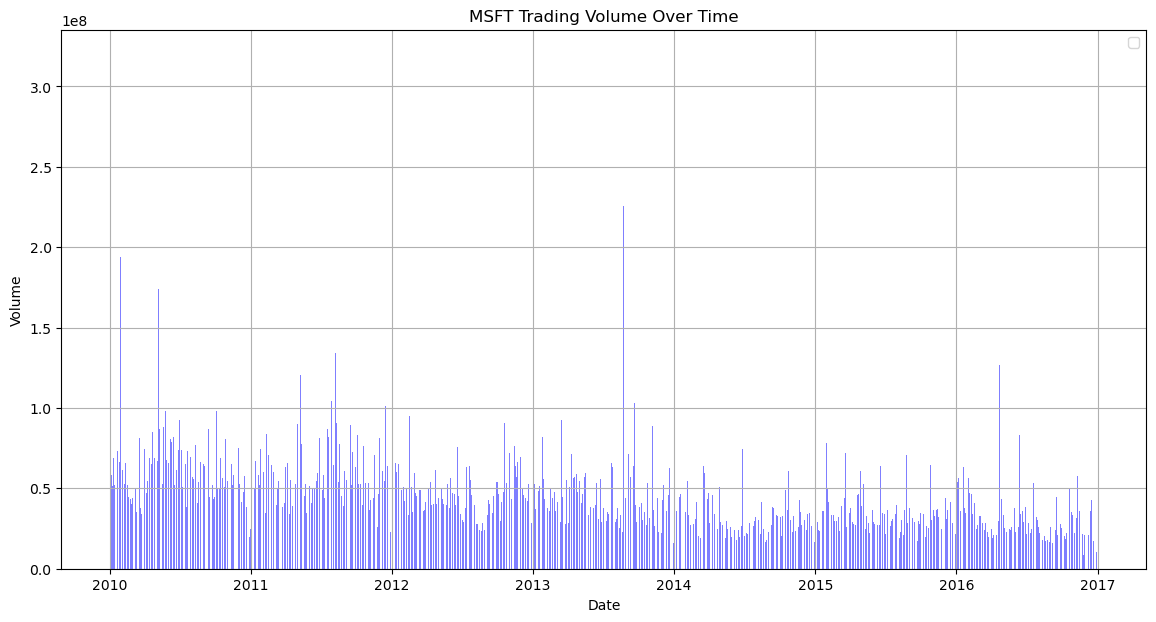

In [86]:
# Plotting function
def plot_data(df, title, y_label, *columns, kind='line'):
    plt.figure(figsize=(14, 7))
    if kind == 'line':
        for column in columns:
            plt.plot(df[column], label=column)
    elif kind == 'bar':
        plt.bar(df.index, df[columns[0]], color='blue', alpha=0.5)
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel(y_label)
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot the closing prices over time
plot_data(msft_prices_df, 'MSFT Closing Prices Over Time', 'Closing Price', 'close')

# Calculate moving averages and plot them with closing prices
msft_prices_df['MA50'] = msft_prices_df['close'].rolling(window=50).mean()
msft_prices_df['MA200'] = msft_prices_df['close'].rolling(window=200).mean()
plot_data(msft_prices_df, 'MSFT Closing Prices with Moving Averages', 'Price', 'close', 'MA50', 'MA200')

# Plot the volume of trades over time
plot_data(msft_prices_df, 'MSFT Trading Volume Over Time', 'Volume', 'volume', kind='bar')


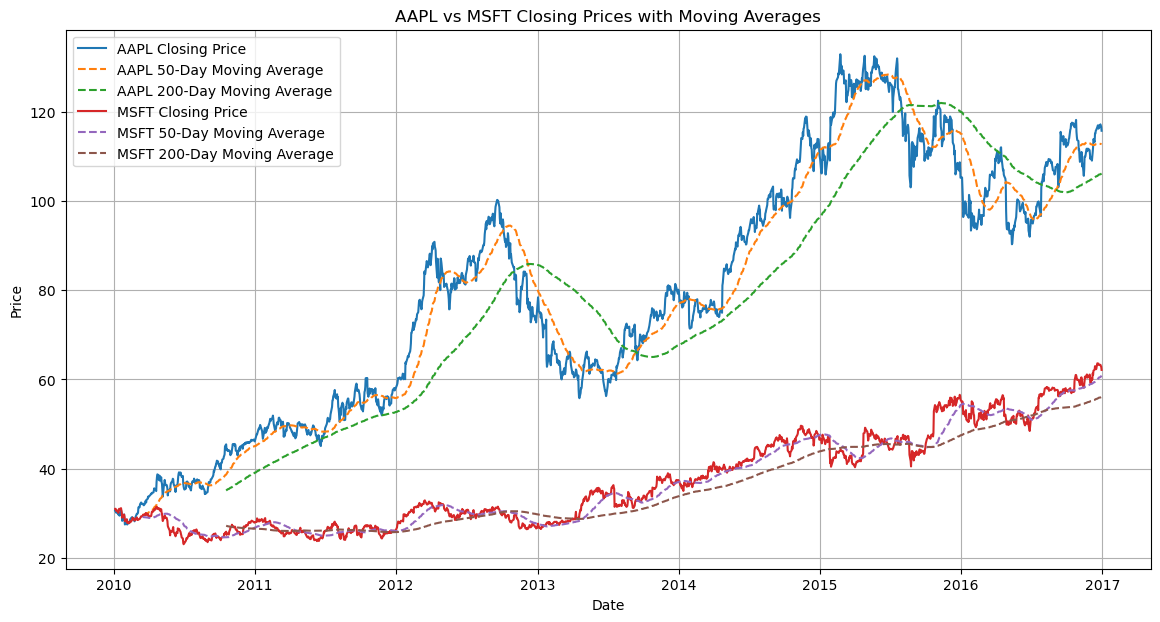

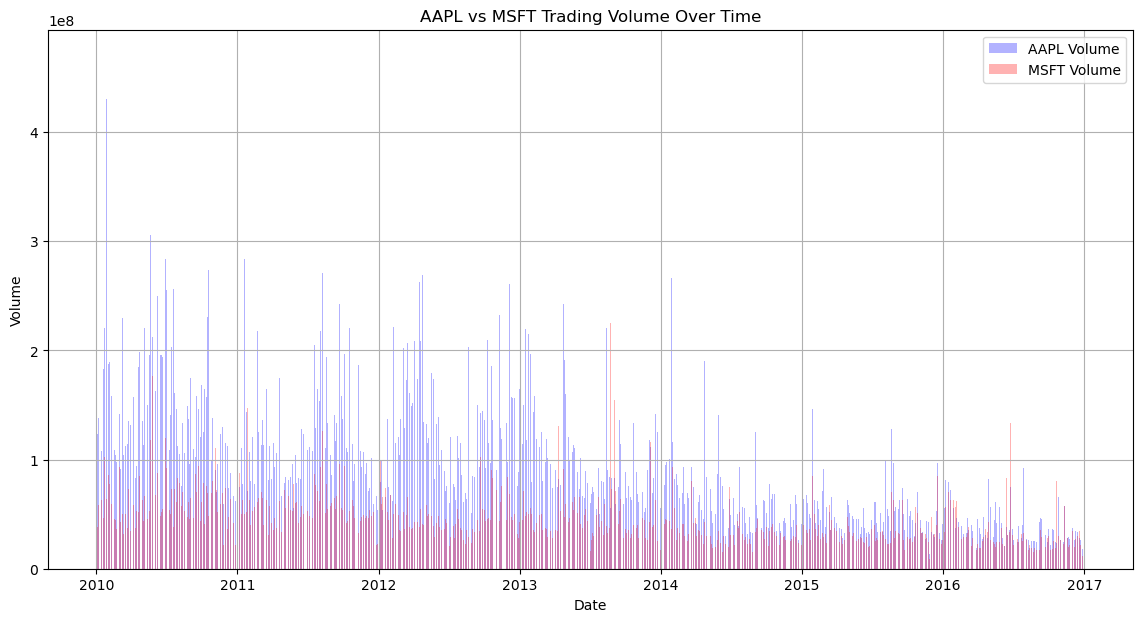

In [88]:

# Filter and process data for given symbols
def process_data(symbol):
    df = prices_df[prices_df['symbol'] == symbol].copy()
    df['date'] = pd.to_datetime(df['date'])
    df.set_index('date', inplace=True)
    df['MA50'] = df['close'].rolling(window=50).mean()
    df['MA200'] = df['close'].rolling(window=200).mean()
    return df

aapl_prices_df = process_data('AAPL')
msft_prices_df = process_data('MSFT')

# Plot the closing prices and moving averages for AAPL and MSFT
plt.figure(figsize=(14, 7))

# Plot AAPL
plt.plot(aapl_prices_df['close'], label='AAPL Closing Price')
plt.plot(aapl_prices_df['MA50'], label='AAPL 50-Day Moving Average', linestyle='--')
plt.plot(aapl_prices_df['MA200'], label='AAPL 200-Day Moving Average', linestyle='--')

# Plot MSFT
plt.plot(msft_prices_df['close'], label='MSFT Closing Price')
plt.plot(msft_prices_df['MA50'], label='MSFT 50-Day Moving Average', linestyle='--')
plt.plot(msft_prices_df['MA200'], label='MSFT 200-Day Moving Average', linestyle='--')

plt.title('AAPL vs MSFT Closing Prices with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Plot the volume of trades for AAPL and MSFT
plt.figure(figsize=(14, 7))

# Plot AAPL volume
plt.bar(aapl_prices_df.index, aapl_prices_df['volume'], color='blue', alpha=0.3, label='AAPL Volume')

# Plot MSFT volume
plt.bar(msft_prices_df.index, msft_prices_df['volume'], color='red', alpha=0.3, label='MSFT Volume')

plt.title('AAPL vs MSFT Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.grid(True)
plt.show()



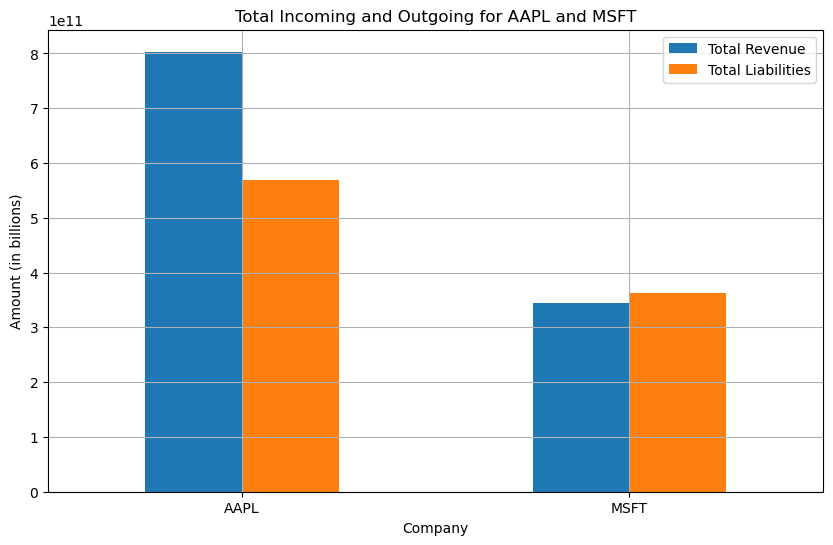

In [76]:
# Filter and summarize data for given companies
companies = ['AAPL', 'MSFT']
summary_df = fundamentals_df[fundamentals_df['Ticker Symbol'].isin(companies)].groupby('Ticker Symbol')[['Total Revenue', 'Total Liabilities']].sum()

# Plot the results
summary_df.plot(kind='bar', figsize=(10, 6))
plt.title('Total Incoming and Outgoing for AAPL and MSFT')
plt.xlabel('Company')
plt.ylabel('Amount (in billions)')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

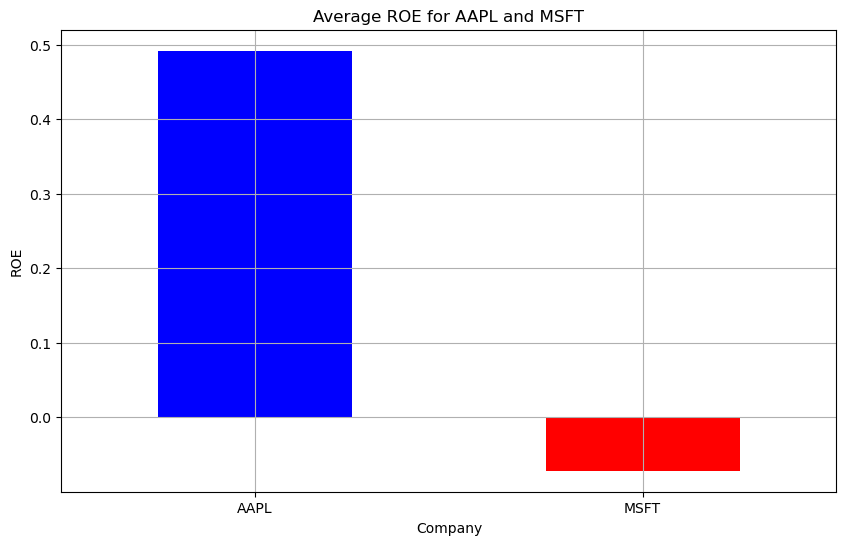

In [80]:
# Calculate ROE
filtered_fundamentals_df.loc[:, 'ROE'] = (filtered_fundamentals_df['Total Revenue'] - filtered_fundamentals_df['Total Liabilities']) / filtered_fundamentals_df['Total Equity']

# Group by company and calculate the mean ROE
mean_roe = filtered_fundamentals_df.groupby('Ticker Symbol')['ROE'].mean()

# Plot the ROE for both companies
mean_roe.plot(kind='bar', figsize=(10, 6), color=['blue', 'red'])
plt.title('Average ROE for AAPL and MSFT')
plt.xlabel('Company')
plt.ylabel('ROE')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()


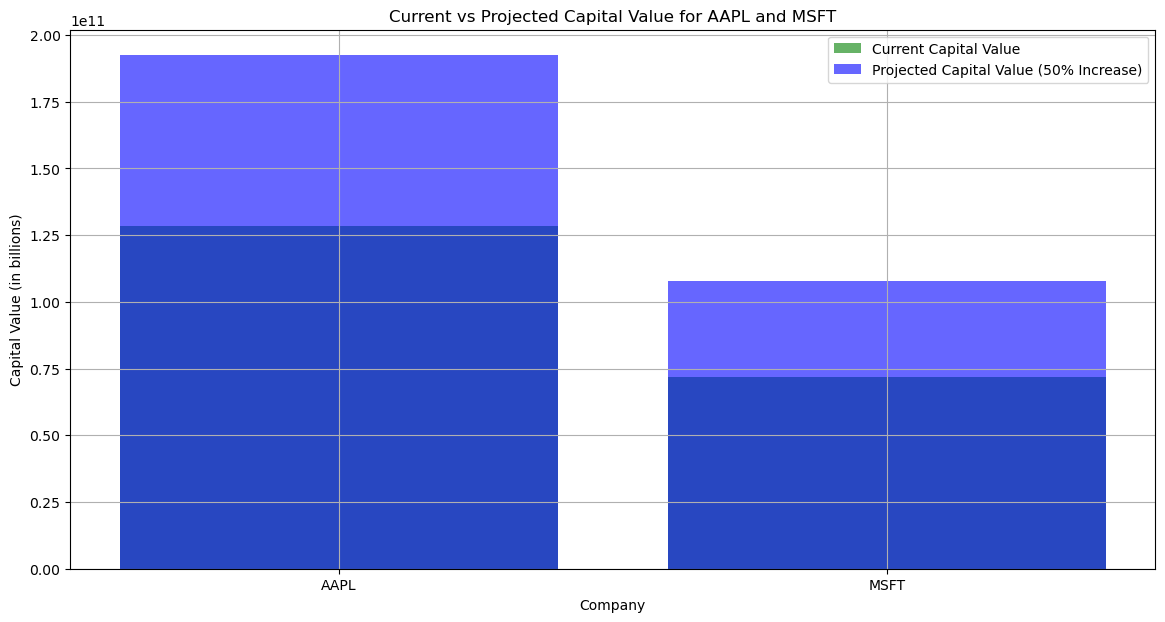

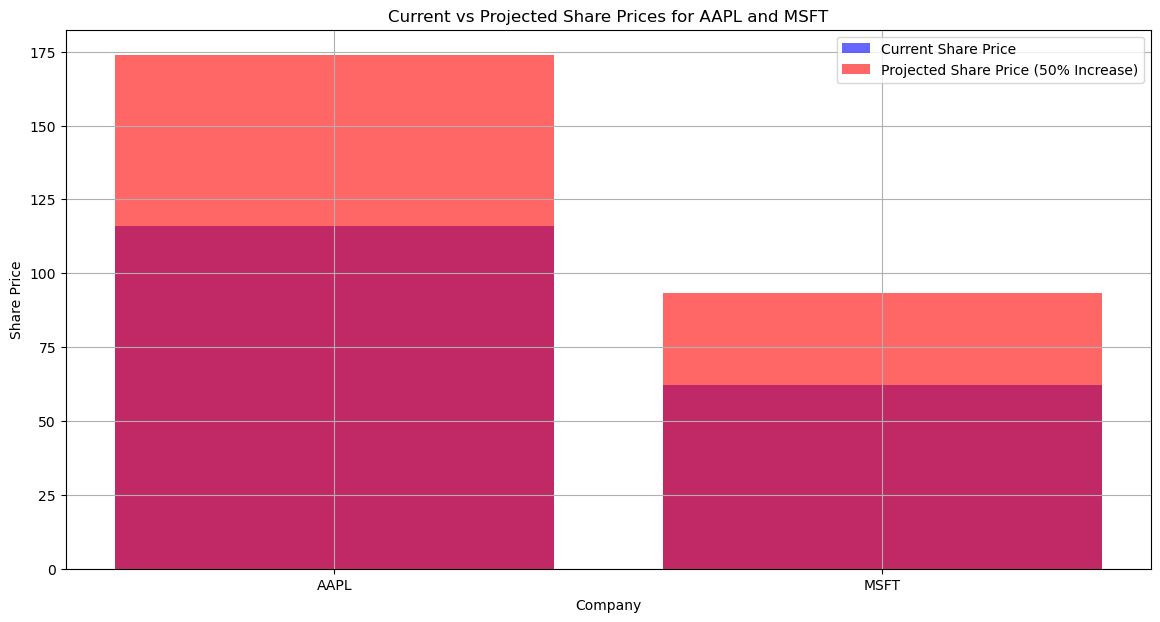

In [92]:

# Calculate the current capital value (Total Equity)
current_capital_value = filtered_fundamentals_df.groupby('Ticker Symbol')['Total Equity'].last()

# Project the capital value with a 50% increase over 5 years
projected_capital_value = current_capital_value * 1.5

# Filter the data for AAPL and MSFT
aapl_prices_df = prices_df[prices_df['symbol'] == 'AAPL'].copy()
msft_prices_df = prices_df[prices_df['symbol'] == 'MSFT'].copy()

# Convert the 'date' column to datetime format
aapl_prices_df['date'] = pd.to_datetime(aapl_prices_df['date'])
msft_prices_df['date'] = pd.to_datetime(msft_prices_df['date'])

# Set the 'date' column as the index
aapl_prices_df.set_index('date', inplace=True)
msft_prices_df.set_index('date', inplace=True)

# Calculate the current and projected share prices
current_aapl_price = aapl_prices_df['close'].iloc[-1]
current_msft_price = msft_prices_df['close'].iloc[-1]

projected_aapl_price = current_aapl_price * 1.5
projected_msft_price = current_msft_price * 1.5

# Plot the current and projected capital values
plt.figure(figsize=(14, 7))
plt.bar(['AAPL', 'MSFT'], current_capital_value, color='green', alpha=0.6, label='Current Capital Value')
plt.bar(['AAPL', 'MSFT'], projected_capital_value, color='blue', alpha=0.6, label='Projected Capital Value (50% Increase)')
plt.title('Current vs Projected Capital Value for AAPL and MSFT')
plt.xlabel('Company')
plt.ylabel('Capital Value (in billions)')
plt.legend()
plt.grid(True)
plt.show()

# Plot the current and projected share prices
plt.figure(figsize=(14, 7))
plt.bar(['AAPL', 'MSFT'], [current_aapl_price, current_msft_price], color='blue', alpha=0.6, label='Current Share Price')
plt.bar(['AAPL', 'MSFT'], [projected_aapl_price, projected_msft_price], color='red', alpha=0.6, label='Projected Share Price (50% Increase)')
plt.title('Current vs Projected Share Prices for AAPL and MSFT')
plt.xlabel('Company')
plt.ylabel('Share Price')
plt.legend()
plt.grid(True)
plt.show()


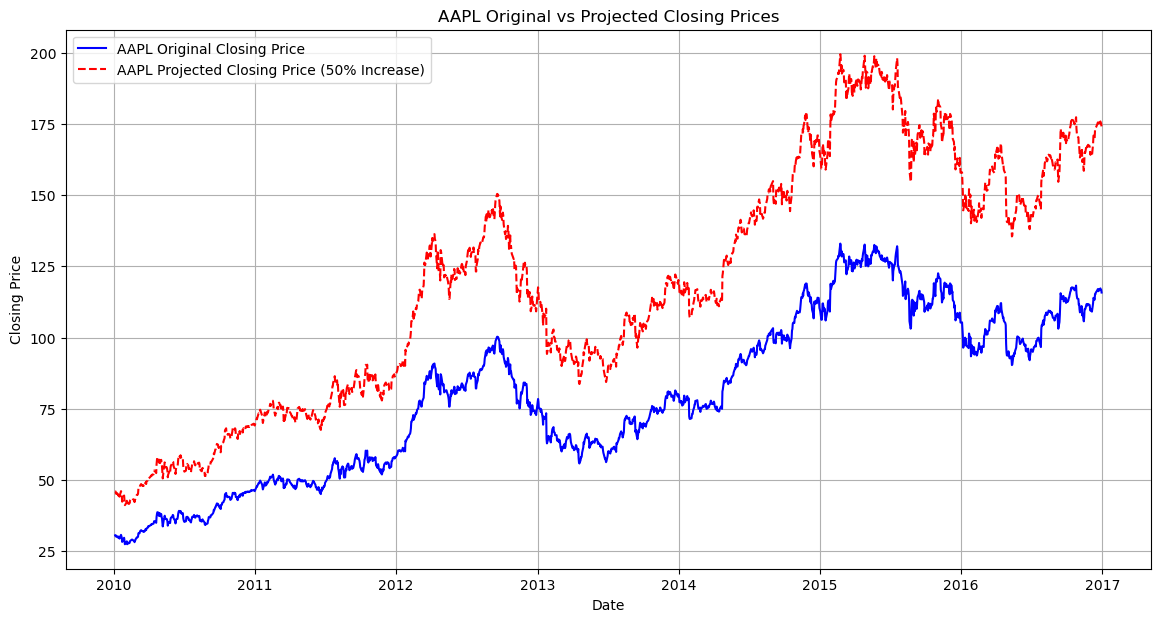

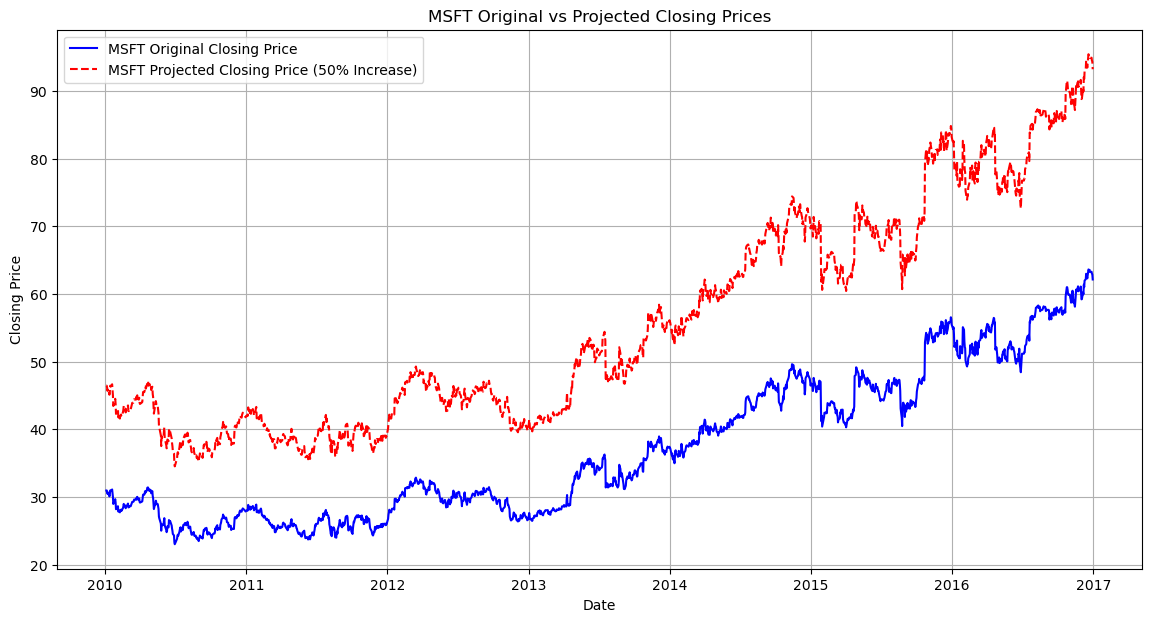

In [32]:
# Filter the data for AAPL and MSFT
aapl_prices_df = prices_df[prices_df['symbol'] == 'AAPL'].copy()
msft_prices_df = prices_df[prices_df['symbol'] == 'MSFT'].copy()

# Convert the 'date' column to datetime format
aapl_prices_df['date'] = pd.to_datetime(aapl_prices_df['date'])
msft_prices_df['date'] = pd.to_datetime(msft_prices_df['date'])

# Set the 'date' column as the index
aapl_prices_df.set_index('date', inplace=True)
msft_prices_df.set_index('date', inplace=True)

# Apply a 50% increase to the closing prices
aapl_prices_df['Projected Close'] = aapl_prices_df['close'] * 1.5
msft_prices_df['Projected Close'] = msft_prices_df['close'] * 1.5

# Plot the original and projected closing prices for AAPL
plt.figure(figsize=(14, 7))
plt.plot(aapl_prices_df['close'], label='AAPL Original Closing Price', color='blue')
plt.plot(aapl_prices_df['Projected Close'], label='AAPL Projected Closing Price (50% Increase)', color='red', linestyle='--')
plt.title('AAPL Original vs Projected Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()

# Plot the original and projected closing prices for MSFT
plt.figure(figsize=(14, 7))
plt.plot(msft_prices_df['close'], label='MSFT Original Closing Price', color='blue')
plt.plot(msft_prices_df['Projected Close'], label='MSFT Projected Closing Price (50% Increase)', color='red', linestyle='--')
plt.title('MSFT Original vs Projected Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()


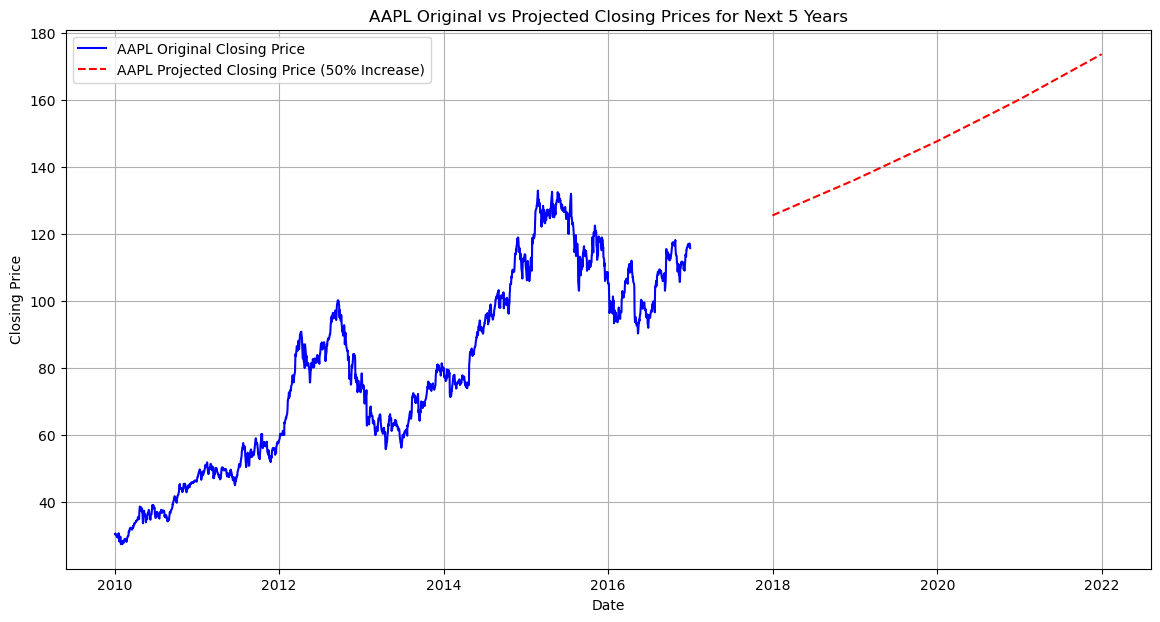

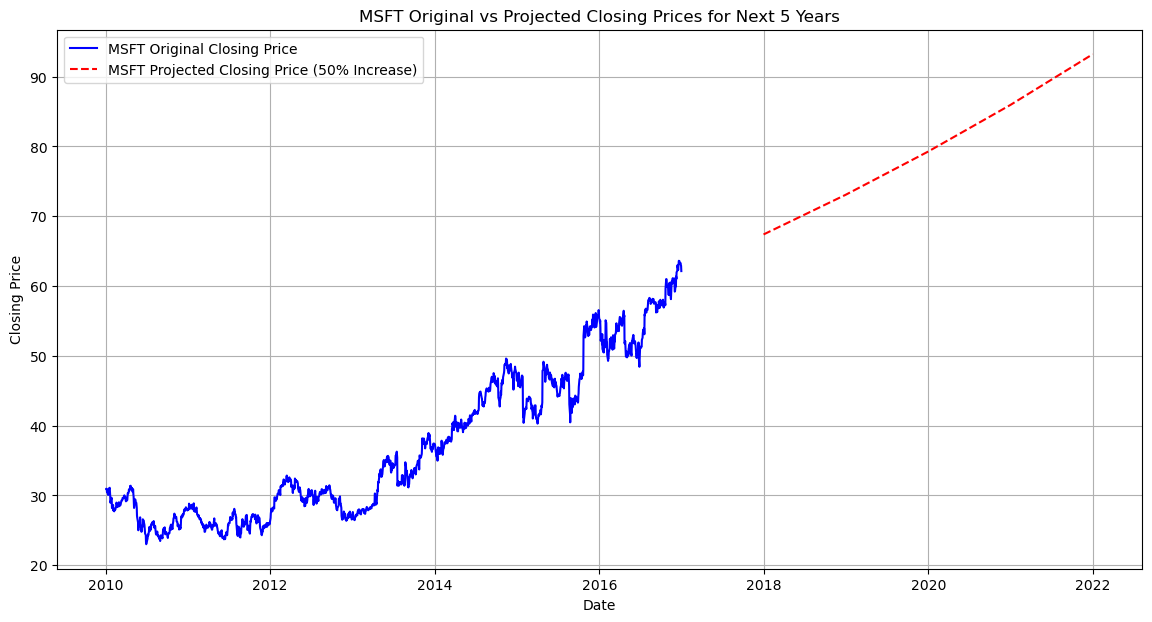

In [100]:
import numpy as np
import matplotlib.pyplot as plt
# Filter the data for AAPL and MSFT
aapl_prices_df = prices_df[prices_df['symbol'] == 'AAPL'].copy()
msft_prices_df = prices_df[prices_df['symbol'] == 'MSFT'].copy()

# Convert the 'date' column to datetime format
aapl_prices_df['date'] = pd.to_datetime(aapl_prices_df['date'])
msft_prices_df['date'] = pd.to_datetime(msft_prices_df['date'])

# Set the 'date' column as the index
aapl_prices_df.set_index('date', inplace=True)
msft_prices_df.set_index('date', inplace=True)

# Calculate the last available closing price
current_aapl_price = aapl_prices_df['close'].iloc[-1]
current_msft_price = msft_prices_df['close'].iloc[-1]

# Calculate the annual growth rate for a 50% increase over 5 years
annual_growth_rate = (1 + 0.5) ** (1/5) - 1

# Project the prices for the next 5 years
years = np.arange(1, 6)
aapl_projected_prices = [current_aapl_price * (1 + annual_growth_rate) ** year for year in years]
msft_projected_prices = [current_msft_price * (1 + annual_growth_rate) ** year for year in years]

# Create future dates for the next 5 years
last_date = max(aapl_prices_df.index.max(), msft_prices_df.index.max())
future_dates = [last_date + pd.DateOffset(years=year) for year in years]

# Plot the original and projected closing prices for AAPL
plt.figure(figsize=(14, 7))
plt.plot(aapl_prices_df['close'], label='AAPL Original Closing Price', color='blue')
plt.plot(future_dates, aapl_projected_prices, label='AAPL Projected Closing Price (50% Increase)', color='red', linestyle='--')
plt.title('AAPL Original vs Projected Closing Prices for Next 5 Years')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()

# Plot the original and projected closing prices for MSFT
plt.figure(figsize=(14, 7))
plt.plot(msft_prices_df['close'], label='MSFT Original Closing Price', color='blue')
plt.plot(future_dates, msft_projected_prices, label='MSFT Projected Closing Price (50% Increase)', color='red', linestyle='--')
plt.title('MSFT Original vs Projected Closing Prices for Next 5 Years')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()


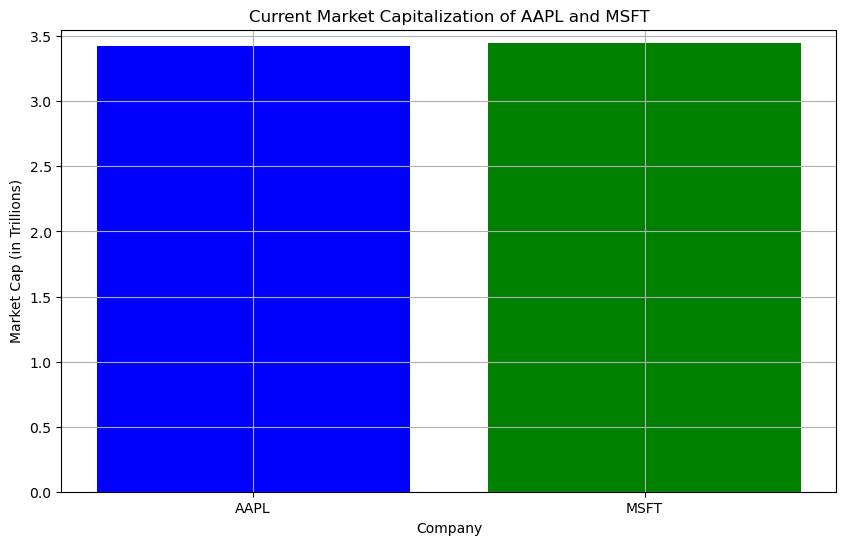

In [36]:
import matplotlib.pyplot as plt

# Market capitalizations in trillions
aapl_market_cap = 3.423  # AAPL market cap in trillions
msft_market_cap = 3.450  # MSFT market cap in trillions

# Create a DataFrame for visualization
market_caps = pd.DataFrame({
    'Company': ['AAPL', 'MSFT'],
    'Market Cap (in Trillions)': [aapl_market_cap, msft_market_cap]
})

# Plot the market capitalizations
plt.figure(figsize=(10, 6))
plt.bar(market_caps['Company'], market_caps['Market Cap (in Trillions)'], color=['blue', 'green'])
plt.title('Current Market Capitalization of AAPL and MSFT')
plt.xlabel('Company')
plt.ylabel('Market Cap (in Trillions)')
plt.ylim(0, max(aapl_market_cap, msft_market_cap) + 0.1)  # Add some space above the bars
plt.grid(True)
plt.show()


/var/folders/05/6wjk98893x39crd_fp3bt1s80000gn/T/ipykernel_44425/810092541.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_fundamentals_df['Total Equity'] = pd.to_numeric(filtered_fundamentals_df['Total Equity'], errors='coerce')


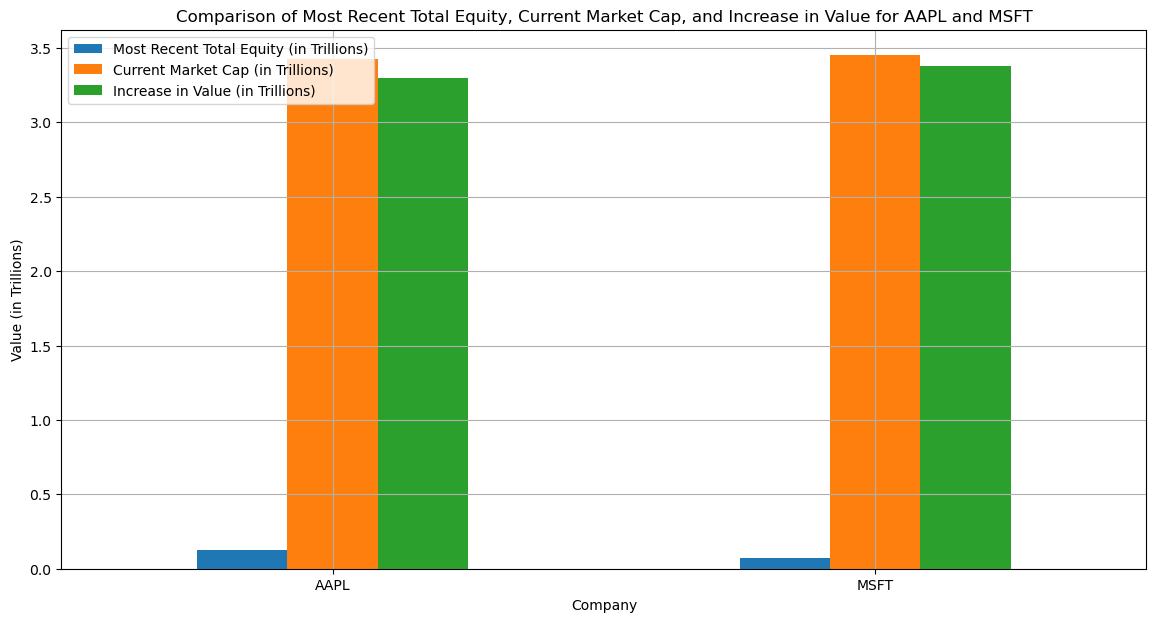

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the fundamentals data
fundamentals_df = pd.read_csv('data.csv/NYSE/fundamentals.csv')

# Filter the data for AAPL and MSFT
companies = ['AAPL', 'MSFT']
filtered_fundamentals_df = fundamentals_df[fundamentals_df['Ticker Symbol'].isin(companies)]

# Ensure 'Total Equity' is numeric
filtered_fundamentals_df['Total Equity'] = pd.to_numeric(filtered_fundamentals_df['Total Equity'], errors='coerce')

# Get the most recent 'Total Equity' for AAPL and MSFT
most_recent_equity = filtered_fundamentals_df.groupby('Ticker Symbol')['Total Equity'].last()

# Current market capitalizations in trillions
current_market_caps = pd.Series([3.423 * 1e12, 3.450 * 1e12], index=['AAPL', 'MSFT'])

# Calculate the increase in value
increase_in_value = current_market_caps - most_recent_equity

# Convert the values to trillions for better readability
most_recent_equity_trillions = most_recent_equity / 1e12
current_market_caps_trillions = current_market_caps / 1e12
increase_in_value_trillions = increase_in_value / 1e12

# Create a DataFrame to display the results
comparison_df = pd.DataFrame({
    'Most Recent Total Equity (in Trillions)': most_recent_equity_trillions,
    'Current Market Cap (in Trillions)': current_market_caps_trillions,
    'Increase in Value (in Trillions)': increase_in_value_trillions
})

# Plot the comparison
comparison_df.plot(kind='bar', figsize=(14, 7))
plt.title('Comparison of Most Recent Total Equity, Current Market Cap, and Increase in Value for AAPL and MSFT')
plt.xlabel('Company')
plt.ylabel('Value (in Trillions)')
plt.grid(True)
plt.xticks(rotation=0)
plt.legend(loc='upper left')
plt.show()
